<b>Why do we need to analyze the data ?</b>
- to understand our client's behaviour 
- to make business decisions based on data
- to validate our business decisions

<b>What tools are you using to analyze the data ?</b>
- excel, sql, programming languages (java, python, etc), big data tools 

<b>What does Big Data mean for you ?</b>
- Big Data can means a large volume of data, which cannot be stored and processed efficiently by traditional data management tools.

<b>Why SQL on Big Data ? </b> 
- SQL is one of the most common skill. Almost any developer knows how to write a simple SQL query.
- If a big data framework would support SQL, all of a sudden, everyone could do analysis on big data ! <br>

There are many SQL tools for big data. Amazon Athena, redshift from Amazon, BigQuery from google. Hive, Spark SQL as open source tools.


<img src='https://github.com/tlapusan/itdays-2019/blob/master/bigdata/resources/images/spark_logo.png?raw=true' />

Most of the time we are used to code/work on a single machine (laptop). But there are moments in our developers' life  when a single machine is not powerful enough, especially when we are dealing with processing of a large volume of data. <br>
One idea would be to use a cluster of machines and use all their resources (CPU, RAM, HDD). If we are talking about a cluster of machines to comunicate between each other, that means that we need networking, multitreading, etc skills...scary.
An ideal scenario would be to have a framework to handle this hard work and to give us the impression that we are still working on a single machine. This is what Apache Spark does !


Apache Spark is a distributed computing engine. It is able to process a large volume data, for tasks like batch or streaming processing, SQL, machine learning, graph processing. wow !

How can we deploy/use it ? <br>

Even if Spark looks like a very big framework, we can install it easily on our laptops and just start coding.  
The best part...the code that we write on our laptops can be deployed and run on a clusters with hundreds of servers, whitout any changes ;) <br>
Supported programming languages : Java, Scala, Python, R.








# Install Spark
We can install Spark for Python (pyspark) using pip package manager.

In [2]:
#!pip install pyspark

  Using cached https://files.pythonhosted.org/packages/87/21/f05c186f4ddb01d15d0ddc36ef4b7e3cedbeb6412274a41f26b55a650ee5/pyspark-2.4.4.tar.gz
  Using cached https://files.pythonhosted.org/packages/e3/53/c737818eb9a7dc32a7cd4f1396e787bd94200c3997c72c1dbe028587bd76/py4j-0.10.7-py2.py3-none-any.whl
  Running setup.py install for pyspark ... done


# Imports

In [4]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F

import matplotlib.pyplot as plt

# Init SparkSession
SparkSession is the entry point for each Spark application. <br>
When we instantiate a SparkSession, we create a driver process from where we can execute user-defined code on our big datasets.

<img src='https://github.com/tlapusan/itdays-2019/blob/master/bigdata/resources/images/spark_application_architecture.png?raw=true'/>


In [5]:
spark = SparkSession.builder.\
            master("local[4]").\
            appName("Spark-SQL").\
            getOrCreate()

In [6]:
spark

# Read data
Spark can read/write data from a variaty of data formats, like csv, json, parquet, jdbc

Dataset description : The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. <br>
More details : https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [7]:
client_bank = spark.read.csv("../resources/data/bank_client_data.csv", header=True, inferSchema=True)
client_campaign =spark.read.csv("../resources/data/campaign_client_data.csv", header=True, inferSchema=True)

# Dataframe

Dataframe is an immutable distributed table-like collection of data. It has a schema which defines the column names and data types.

<img src='https://github.com/tlapusan/itdays-2019/blob/master/bigdata/resources/images/dataframe_structure.png?raw=true' width='70%'/>
 

TODO
- the role of immutability for dataframe ?
- penalty of using python in spark


In [8]:
type(client_bank)

pyspark.sql.dataframe.DataFrame

In [9]:
client_bank.printSchema()

root
 |-- id: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- subscribed: string (nullable = true)



Data related with bank client information : <br>
<b>id</b> - phone call id <br>
<b>age</b> - client age <br>
<b>job</b> - client job <br>
<b>marital</b> - marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed) <br>
<b>education</b> - client education 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown' <br>
<b>default</b> - has credit in default? (categorical: 'no','yes','unknown') <br>
<b>housing</b> -  has housing loan? (categorical: 'no','yes','unknown') <br>
<b>loan</b> - has personal loan? (categorical: 'no','yes','unknown') <br>
<b>subscribed</b> - if the client subscribed to the bank term deposit (categorical: 'no','yes')

In [10]:
client_campaign.printSchema()

root
 |-- id: integer (nullable = true)
 |-- contact: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day_of_week: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)



Data related with the last contact of the current campaign: <br>
<b>id</b> phone call id <br>
<b>contact</b> - contact communication type (categorical: 'cellular','telephone') <br>
<b>month</b> - last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec') <br>
<b>day_of_week</b> - last contact day of the week (categorical: 'mon','tue','wed','thu','fri')<br>
<b>duration</b> - last contact duration, in seconds (numeric). <br>
<b>campaign</b> -  number of contacts performed during this campaign and for this client (numeric, includes last contact) phone call id <br>










# Data analysis
Spark offers multiple ways to analyze data. The most commonly used are DataFrame API and Spark SQL.

## Dataframe API

### subscribed

In [11]:
# how many phone calls were successful/unsuccessful ?
client_bank.\
    groupBy("subscribed").\
    count().\
    show()

+----------+-----+
|subscribed|count|
+----------+-----+
|        no|36548|
|       yes| 4640|
+----------+-----+



### age

In [12]:
# how many phone calls for clients with age between two values ?
calls_between_age = client_bank.\
                        where(F.col("age").between(20,30))

print(calls_between_age.count())
print("----")
print(calls_between_age.show(10))    

7308
----
+---+---+-----------+-------+-------------------+-------+-------+----+----------+
| id|age|        job|marital|          education|default|housing|loan|subscribed|
+---+---+-----------+-------+-------------------+-------+-------+----+----------+
|  8| 24| technician| single|professional.course|     no|    yes|  no|        no|
|  9| 25|   services| single|        high.school|     no|    yes|  no|        no|
| 11| 25|   services| single|        high.school|     no|    yes|  no|        no|
| 12| 29|blue-collar| single|        high.school|     no|     no| yes|        no|
| 20| 30| unemployed|married|        high.school|     no|     no|  no|        no|
| 59| 25| technician| single|  university.degree|     no|    yes|  no|        no|
|160| 24| management| single|  university.degree|     no|    yes|  no|        no|
|178| 28|   services|married|        high.school|     no|    yes|  no|        no|
|216| 30|blue-collar| single|            unknown|     no|    yes|  no|        no|
|217| 

In [13]:
# age distribution
client_bank.\
    groupBy(["age"]).\
    count().\
    show()

+---+-----+
|age|count|
+---+-----+
| 31| 1947|
| 85|   15|
| 65|   44|
| 53|  733|
| 78|   27|
| 34| 1745|
| 81|   20|
| 28| 1001|
| 76|   34|
| 27|  851|
| 26|  698|
| 44| 1011|
| 91|    2|
| 22|  137|
| 47|  928|
| 52|  779|
| 86|    8|
| 40| 1161|
| 20|   65|
| 94|    1|
+---+-----+
only showing top 20 rows



In [14]:
# order age distribution
client_bank.\
    groupBy(["age"]).\
    count().\
    orderBy(F.col("age")).\
    show()

+---+-----+
|age|count|
+---+-----+
| 17|    5|
| 18|   28|
| 19|   42|
| 20|   65|
| 21|  102|
| 22|  137|
| 23|  226|
| 24|  463|
| 25|  598|
| 26|  698|
| 27|  851|
| 28| 1001|
| 29| 1453|
| 30| 1714|
| 31| 1947|
| 32| 1846|
| 33| 1833|
| 34| 1745|
| 35| 1759|
| 36| 1780|
+---+-----+
only showing top 20 rows



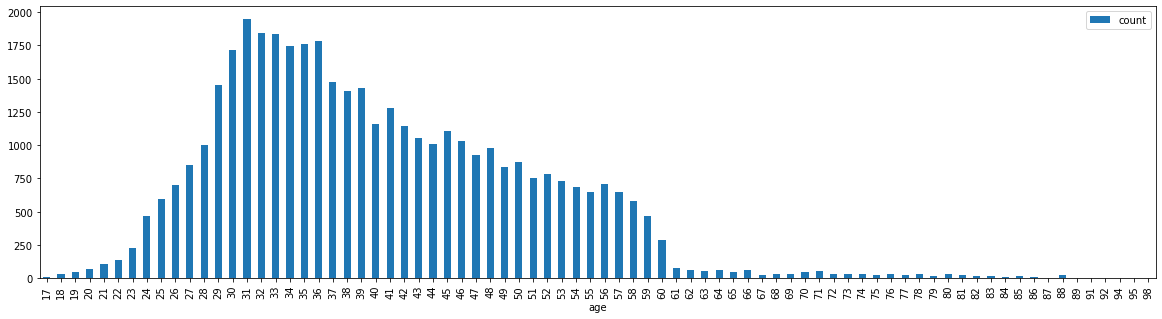

In [16]:
# converting to pandas dataframe and visualisation
client_bank.\
    groupBy(["age"]).\
    count().\
    orderBy("age").\
    toPandas().\
    plot.bar(x="age", y="count", figsize=(20,5))

In [17]:
# rate of subscription / age
client_bank.\
    groupBy("age").\
    agg(F.count("*"), F.mean("subscribed").alias("subscribed_rate")).\
    orderBy("age").\
    show()
# subscribed is a string, that's why we cannot run mean on it

+---+--------+---------------+
|age|count(1)|subscribed_rate|
+---+--------+---------------+
| 17|       5|           null|
| 18|      28|           null|
| 19|      42|           null|
| 20|      65|           null|
| 21|     102|           null|
| 22|     137|           null|
| 23|     226|           null|
| 24|     463|           null|
| 25|     598|           null|
| 26|     698|           null|
| 27|     851|           null|
| 28|    1001|           null|
| 29|    1453|           null|
| 30|    1714|           null|
| 31|    1947|           null|
| 32|    1846|           null|
| 33|    1833|           null|
| 34|    1745|           null|
| 35|    1759|           null|
| 36|    1780|           null|
+---+--------+---------------+
only showing top 20 rows



In [18]:
# adding a new column 
client_bank = client_bank.withColumn("subscribed_int", F.when(F.col("subscribed")=="yes", 1).otherwise(0))

In [19]:
client_bank.show()

+---+---+-----------+--------+-------------------+-------+-------+----+----------+--------------+
| id|age|        job| marital|          education|default|housing|loan|subscribed|subscribed_int|
+---+---+-----------+--------+-------------------+-------+-------+----+----------+--------------+
|  0| 56|  housemaid| married|           basic.4y|     no|     no|  no|        no|             0|
|  1| 57|   services| married|        high.school|unknown|     no|  no|        no|             0|
|  2| 37|   services| married|        high.school|     no|    yes|  no|        no|             0|
|  3| 40|     admin.| married|           basic.6y|     no|     no|  no|        no|             0|
|  4| 56|   services| married|        high.school|     no|     no| yes|        no|             0|
|  5| 45|   services| married|           basic.9y|unknown|     no|  no|        no|             0|
|  6| 59|     admin.| married|professional.course|     no|     no|  no|        no|             0|
|  7| 41|blue-collar

In [20]:
client_bank.\
    groupBy("age").\
    agg(F.count("*"), F.mean("subscribed_int").alias("subscribed_rate")).\
    orderBy("age").\
    show()
#     toPandas().\
#     plot.bar(x="age", y="subscribe_rate", figsize=(20,5))

+---+--------+-------------------+
|age|count(1)|    subscribed_rate|
+---+--------+-------------------+
| 17|       5|                0.4|
| 18|      28|0.42857142857142855|
| 19|      42|0.47619047619047616|
| 20|      65|0.35384615384615387|
| 21|     102|0.28431372549019607|
| 22|     137|0.26277372262773724|
| 23|     226|0.21238938053097345|
| 24|     463| 0.1857451403887689|
| 25|     598|0.15551839464882944|
| 26|     698|0.17478510028653296|
| 27|     851|0.13396004700352526|
| 28|    1001|0.15084915084915085|
| 29|    1453|0.12801101169993118|
| 30|    1714|0.11785297549591599|
| 31|    1947|0.11299435028248588|
| 32|    1846|0.09967497291440953|
| 33|    1833|0.11456628477905073|
| 34|    1745|0.10544412607449857|
| 35|    1759|0.09494030699260944|
| 36|    1780|0.08651685393258426|
+---+--------+-------------------+
only showing top 20 rows



### job

In [21]:
client_bank.\
    groupBy("job").\
    count().\
    orderBy("count", ascending=False).\
    show()

+-------------+-----+
|          job|count|
+-------------+-----+
|       admin.|10422|
|  blue-collar| 9254|
|   technician| 6743|
|     services| 3969|
|   management| 2924|
|      retired| 1720|
| entrepreneur| 1456|
|self-employed| 1421|
|    housemaid| 1060|
|   unemployed| 1014|
|      student|  875|
|      unknown|  330|
+-------------+-----+



In [22]:
client_bank.\
    groupBy("job").\
    agg(F.min("age").alias("min_age"), F.max("age").alias("max_age"), F.avg("age").alias("avg_age")).\
    show()

+-------------+-------+-------+------------------+
|          job|min_age|max_age|           avg_age|
+-------------+-------+-------+------------------+
|   management|     21|     80| 42.36285909712722|
|      retired|     23|     98|62.027325581395345|
|      unknown|     24|     81| 45.56363636363636|
|self-employed|     21|     71| 39.94933145672062|
|      student|     17|     47| 25.89485714285714|
|  blue-collar|     20|     80|39.555759671493405|
| entrepreneur|     20|     69|41.723214285714285|
|       admin.|     20|     72| 38.18729610439455|
|   technician|     20|     70|  38.5076375500519|
|     services|     20|     69| 37.92642983119173|
|    housemaid|     21|     85|              45.5|
|   unemployed|     21|     66| 39.73372781065089|
+-------------+-------+-------+------------------+



## Spark SQL
To run any type of SQL query, we need first to create a temporary view

In [23]:
client_bank.createOrReplaceTempView("client_bank")
client_campaign.createOrReplaceTempView("client_campaign")

In [24]:
spark.sql("""SELECT * 
            FROM client_bank""").show()

+---+---+-----------+--------+-------------------+-------+-------+----+----------+--------------+
| id|age|        job| marital|          education|default|housing|loan|subscribed|subscribed_int|
+---+---+-----------+--------+-------------------+-------+-------+----+----------+--------------+
|  0| 56|  housemaid| married|           basic.4y|     no|     no|  no|        no|             0|
|  1| 57|   services| married|        high.school|unknown|     no|  no|        no|             0|
|  2| 37|   services| married|        high.school|     no|    yes|  no|        no|             0|
|  3| 40|     admin.| married|           basic.6y|     no|     no|  no|        no|             0|
|  4| 56|   services| married|        high.school|     no|     no| yes|        no|             0|
|  5| 45|   services| married|           basic.9y|unknown|     no|  no|        no|             0|
|  6| 59|     admin.| married|professional.course|     no|     no|  no|        no|             0|
|  7| 41|blue-collar

In [25]:
spark.sql("""SELECT job, count(*) AS count
            FROM client_bank
            GROUP BY job""").show()

+-------------+-----+
|          job|count|
+-------------+-----+
|   management| 2924|
|      retired| 1720|
|      unknown|  330|
|self-employed| 1421|
|      student|  875|
|  blue-collar| 9254|
| entrepreneur| 1456|
|       admin.|10422|
|   technician| 6743|
|     services| 3969|
|    housemaid| 1060|
|   unemployed| 1014|
+-------------+-----+



In [26]:
spark.sql("""SELECT *
            FROM client_campaign""").show()

+---+---------+-----+-----------+--------+--------+
| id|  contact|month|day_of_week|duration|campaign|
+---+---------+-----+-----------+--------+--------+
|  0|telephone|  may|        mon|     261|       1|
|  1|telephone|  may|        mon|     149|       1|
|  2|telephone|  may|        mon|     226|       1|
|  3|telephone|  may|        mon|     151|       1|
|  4|telephone|  may|        mon|     307|       1|
|  5|telephone|  may|        mon|     198|       1|
|  6|telephone|  may|        mon|     139|       1|
|  7|telephone|  may|        mon|     217|       1|
|  8|telephone|  may|        mon|     380|       1|
|  9|telephone|  may|        mon|      50|       1|
| 10|telephone|  may|        mon|      55|       1|
| 11|telephone|  may|        mon|     222|       1|
| 12|telephone|  may|        mon|     137|       1|
| 13|telephone|  may|        mon|     293|       1|
| 14|telephone|  may|        mon|     146|       1|
| 15|telephone|  may|        mon|     174|       1|
| 16|telepho

### marital

#### Select all the phone calls for single persons

In [27]:
# using Dataframe API
client_bank.\
        where(F.col("marital")=="single").\
        show()

+---+---+-----------+-------+-------------------+-------+-------+----+----------+--------------+
| id|age|        job|marital|          education|default|housing|loan|subscribed|subscribed_int|
+---+---+-----------+-------+-------------------+-------+-------+----+----------+--------------+
|  8| 24| technician| single|professional.course|     no|    yes|  no|        no|             0|
|  9| 25|   services| single|        high.school|     no|    yes|  no|        no|             0|
| 11| 25|   services| single|        high.school|     no|    yes|  no|        no|             0|
| 12| 29|blue-collar| single|        high.school|     no|     no| yes|        no|             0|
| 19| 39| management| single|           basic.9y|unknown|     no|  no|        no|             0|
| 22| 55|    retired| single|        high.school|     no|    yes|  no|        no|             0|
| 23| 41| technician| single|        high.school|     no|    yes|  no|        no|             0|
| 28| 54| technician| single| 

In [28]:
# using Spark SQL
spark.sql("""SELECT * 
            FROM client_bank
            WHERE marital == 'single'""").show()

+---+---+-----------+-------+-------------------+-------+-------+----+----------+--------------+
| id|age|        job|marital|          education|default|housing|loan|subscribed|subscribed_int|
+---+---+-----------+-------+-------------------+-------+-------+----+----------+--------------+
|  8| 24| technician| single|professional.course|     no|    yes|  no|        no|             0|
|  9| 25|   services| single|        high.school|     no|    yes|  no|        no|             0|
| 11| 25|   services| single|        high.school|     no|    yes|  no|        no|             0|
| 12| 29|blue-collar| single|        high.school|     no|     no| yes|        no|             0|
| 19| 39| management| single|           basic.9y|unknown|     no|  no|        no|             0|
| 22| 55|    retired| single|        high.school|     no|    yes|  no|        no|             0|
| 23| 41| technician| single|        high.school|     no|    yes|  no|        no|             0|
| 28| 54| technician| single| 

#### Distribution of number of phone calls and rate of success based on marital status

In [29]:
# using Dataframe API
client_bank.\
    groupBy("marital").\
    agg(F.count("*").alias("count"), F.avg("subscribed_int")).\
    show()

+--------+-----+-------------------+
| marital|count|avg(subscribed_int)|
+--------+-----+-------------------+
| unknown|   80|               0.15|
|divorced| 4612|0.10320901994796183|
| married|24928|0.10157252888318356|
|  single|11568| 0.1400414937759336|
+--------+-----+-------------------+



In [30]:
# using Spark SQL
spark.sql("""SELECT marital, count(*) as count, avg(subscribed_int)
            FROM client_bank
            GROUP BY marital""").show()

+--------+-----+-------------------+
| marital|count|avg(subscribed_int)|
+--------+-----+-------------------+
| unknown|   80|               0.15|
|divorced| 4612|0.10320901994796183|
| married|24928|0.10157252888318356|
|  single|11568| 0.1400414937759336|
+--------+-----+-------------------+



### Joins
docs : https://spark.apache.org/docs/latest/api/python/pyspark.sql.html#pyspark.sql.DataFrame.join

In [31]:
full_dataset = client_bank.join(client_campaign, ["id"], how="inner")

In [32]:
# for pretty printing : vertical=True or cast to pandas dataframe
full_dataset.\
    show(20)

+---+---+-----------+--------+-------------------+-------+-------+----+----------+--------------+---------+-----+-----------+--------+--------+
| id|age|        job| marital|          education|default|housing|loan|subscribed|subscribed_int|  contact|month|day_of_week|duration|campaign|
+---+---+-----------+--------+-------------------+-------+-------+----+----------+--------------+---------+-----+-----------+--------+--------+
|  0| 56|  housemaid| married|           basic.4y|     no|     no|  no|        no|             0|telephone|  may|        mon|     261|       1|
|  1| 57|   services| married|        high.school|unknown|     no|  no|        no|             0|telephone|  may|        mon|     149|       1|
|  2| 37|   services| married|        high.school|     no|    yes|  no|        no|             0|telephone|  may|        mon|     226|       1|
|  3| 40|     admin.| married|           basic.6y|     no|     no|  no|        no|             0|telephone|  may|        mon|     151|  

In [33]:
# same join, but now in pure SQL
spark.sql("""SELECT *
            FROM client_bank cb inner join client_campaign cc ON cb.id == cc.id""").show()

+---+---+-----------+--------+-------------------+-------+-------+----+----------+--------------+---+---------+-----+-----------+--------+--------+
| id|age|        job| marital|          education|default|housing|loan|subscribed|subscribed_int| id|  contact|month|day_of_week|duration|campaign|
+---+---+-----------+--------+-------------------+-------+-------+----+----------+--------------+---+---------+-----+-----------+--------+--------+
|  0| 56|  housemaid| married|           basic.4y|     no|     no|  no|        no|             0|  0|telephone|  may|        mon|     261|       1|
|  1| 57|   services| married|        high.school|unknown|     no|  no|        no|             0|  1|telephone|  may|        mon|     149|       1|
|  2| 37|   services| married|        high.school|     no|    yes|  no|        no|             0|  2|telephone|  may|        mon|     226|       1|
|  3| 40|     admin.| married|           basic.6y|     no|     no|  no|        no|             0|  3|telephone| 

#### Most successful months

In [34]:
full_dataset.createOrReplaceTempView("full_dataset")

In [35]:
spark.sql("""SELECT month, count(*) as count, avg(subscribed_int) as month_success_rate
            FROM full_dataset
            GROUP BY month
            ORDER BY month_success_rate DESC""").show()

+-----+-----+-------------------+
|month|count| month_success_rate|
+-----+-----+-------------------+
|  mar|  546| 0.5054945054945055|
|  dec|  182|  0.489010989010989|
|  sep|  570|0.44912280701754387|
|  oct|  718| 0.4387186629526462|
|  apr| 2632| 0.2047872340425532|
|  aug| 6178| 0.1060213661379087|
|  jun| 5318|0.10511470477623167|
|  nov| 4101|0.10143867349426969|
|  jul| 7174|0.09046557011430165|
|  may|13769|0.06434744716391895|
+-----+-----+-------------------+



## Combine SQL with Dataframe API

In [36]:
spark.sql("""SELECT age, job, contact
            FROM full_dataset
            WHERE job == 'services'""").\
    where(F.col("age")==37).\
    where(F.col("contact")=="cellular").show()

+---+--------+--------+
|age|     job| contact|
+---+--------+--------+
| 37|services|cellular|
| 37|services|cellular|
| 37|services|cellular|
| 37|services|cellular|
| 37|services|cellular|
| 37|services|cellular|
| 37|services|cellular|
| 37|services|cellular|
| 37|services|cellular|
| 37|services|cellular|
| 37|services|cellular|
| 37|services|cellular|
| 37|services|cellular|
| 37|services|cellular|
| 37|services|cellular|
| 37|services|cellular|
| 37|services|cellular|
| 37|services|cellular|
| 37|services|cellular|
| 37|services|cellular|
+---+--------+--------+
only showing top 20 rows



# How Spark can run SQL code ?
An SQL query declares our intentions, but it does not tell the exact logic flow to run. We need to convert the SQL in a query plan, which is a set of steps of executions. <br>
This process was not invented by Spark, it happens in all SQL servers.

<img src='https://github.com/tlapusan/itdays-2019/blob/master/bigdata/resources/images/sql_catalyst.png?raw=true'/>



<b>Parsed logical</b> plan checks code validity. <br>
<b>Analyzed logical plan</b> checks for tables, columns validity. <br>
<b>Optimized logical plan</b> tries to apply optimisations on the logical plan, like pushing down predicates or column selections. <br>
<b>Physical plan</b> specifies exactly how the plan will be executed on the cluster.

<img src='https://github.com/tlapusan/itdays-2019/blob/master/bigdata/resources/images/query_plan_states.png?raw=true'/>

## Dataframe API

In [37]:
full_dataset.select(["age","job","marital","education", "duration"]).\
    where(F.col("age") > 30).\
    where(F.col("job") == "management").explain(extended=True)

== Parsed Logical Plan ==
'Filter ('job = management)
+- Filter (age#11 > 30)
   +- Project [age#11, job#12, marital#13, education#14, duration#42]
      +- Project [id#10, age#11, job#12, marital#13, education#14, default#15, housing#16, loan#17, subscribed#18, subscribed_int#235, contact#39, month#40, day_of_week#41, duration#42, campaign#43]
         +- Join Inner, (id#10 = id#38)
            :- Project [id#10, age#11, job#12, marital#13, education#14, default#15, housing#16, loan#17, subscribed#18, CASE WHEN (subscribed#18 = yes) THEN 1 ELSE 0 END AS subscribed_int#235]
            :  +- Relation[id#10,age#11,job#12,marital#13,education#14,default#15,housing#16,loan#17,subscribed#18] csv
            +- Relation[id#38,contact#39,month#40,day_of_week#41,duration#42,campaign#43] csv

== Analyzed Logical Plan ==
age: int, job: string, marital: string, education: string, duration: int
Filter (job#12 = management)
+- Filter (age#11 > 30)
   +- Project [age#11, job#12, marital#13, educati

## SQL

In [38]:
spark.sql("""
        SELECT age, job, marital, education, duration 
        FROM full_dataset
        WHERE age > 30 AND job =='management'""").explain(extended=True)

== Parsed Logical Plan ==
'Project ['age, 'job, 'marital, 'education, 'duration]
+- 'Filter (('age > 30) && ('job = management))
   +- 'UnresolvedRelation `full_dataset`

== Analyzed Logical Plan ==
age: int, job: string, marital: string, education: string, duration: int
Project [age#11, job#12, marital#13, education#14, duration#42]
+- Filter ((age#11 > 30) && (job#12 = management))
   +- SubqueryAlias `full_dataset`
      +- Project [id#10, age#11, job#12, marital#13, education#14, default#15, housing#16, loan#17, subscribed#18, subscribed_int#235, contact#39, month#40, day_of_week#41, duration#42, campaign#43]
         +- Join Inner, (id#10 = id#38)
            :- Project [id#10, age#11, job#12, marital#13, education#14, default#15, housing#16, loan#17, subscribed#18, CASE WHEN (subscribed#18 = yes) THEN 1 ELSE 0 END AS subscribed_int#235]
            :  +- Relation[id#10,age#11,job#12,marital#13,education#14,default#15,housing#16,loan#17,subscribed#18] csv
            +- Relation[i

# Spark operations
In Spark we have two types of operations : transformations and actions. <br>
Transformations are those operations used to express the business logic of a spark application. <br>
Actions are those operations used to trigger a pipeline of transformations.

Lazy evaluation : spark will compute all the transformations, only in the last minute, when you actually call an action on them. In this way, Spark can look at the whole set of transformation and will try to apply optimisations on it.




In [39]:
# tranformation
%timeit -r1 -n1 print(client_bank.\
                            where(F.col("age")==24)) 

DataFrame[id: int, age: int, job: string, marital: string, education: string, default: string, housing: string, loan: string, subscribed: string, subscribed_int: int]
52.8 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [40]:
# action
%timeit -r1 -n1 print(client_bank.\
                            where(F.col("age")==24).\
                            count())

463
142 ms ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


# Spark SQL functions
https://spark.apache.org/docs/latest/api/python/pyspark.sql.html

# Spark SQL resources
Book - https://www.amazon.com/Spark-Definitive-Guide-Processing-Simple/dp/1491912219 <br>
Videos :
- https://databricks.com/sparkaisummit/north-america/sessions
- https://databricks.com/session/from-basic-to-advanced-aggregate-operators-in-apache-spark-sql-2-2-by-examples-and-their-catalyst-optimizations-continues


project push down, filter push down, and partition pruning : https://drill.apache.org/docs/parquet-filter-pushdown/